## Support Vector Machines

SVMs are particularly powerful and flexible class of supervised algorithms for both classification and regression

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use Seaborn plotting defaults
import seaborn as sns; sns.set()

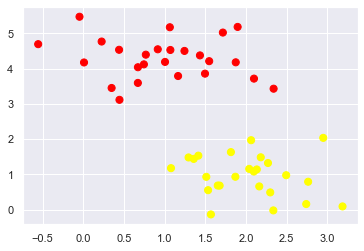

In [5]:
from sklearn.datasets._samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

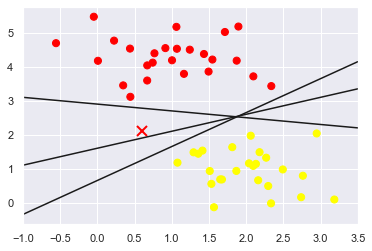

In [7]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);

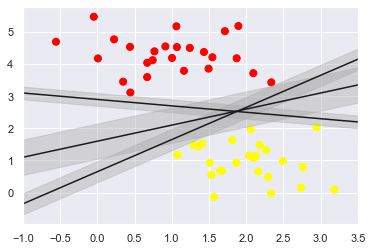

In [9]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)
plt.xlim(-1, 3.5);

In support vector machines, the line that maximizes this margin is the one we will
choose as the optimal model. Support vector machines are an example of such a maximum
margin estimator

In [11]:
from sklearn.svm import SVC
model = SVC(kernel="linear", C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [15]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=300, linewidth=1, facecolors='none');
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

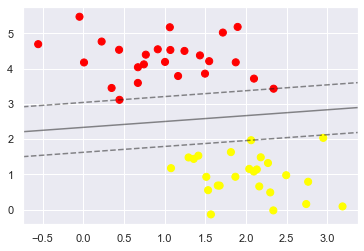

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [17]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

A key to this classifier’s success is that for the fit, only the position of the support vectors
matters; any points further from the margin that are on the correct side do not
modify the fit! Technically, this is because these points do not contribute to the loss
function used to fit the model, so their position and number do not matter so long as
they do not cross the margin

In [18]:
# Kernel SVM
from sklearn.datasets._samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)


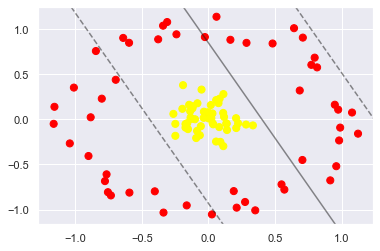

In [19]:
clf = SVC(kernel="linear").fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
plot_svc_decision_function(clf, plot_support=False)

We might project the data into a higher dimension such that a linear separator would be sufficient. One simple projection we could use would be to compute a radial basis function centered on the middle clump. However, if we had not centered our radial basis function in the right location, we would not have seen such clean, linearly separable results. In general, the need to make such a choice is a problem: we would like to somehow automatically find the best basis functions to use.

One strategy to this end is to compute a basis function centered at every point in the dataset, and let the SVM algorithm sift through the results. This type of basis function transformation is known as a *kernel transformation*, as it is based on a similarity relationship
(or kernel) between each pair of points.

A potential problem with this strategy—projecting N points into N dimensions—is that it might become very computationally intensive as N grows large. However, because of a neat little procedure known as the kernel trick, a fit on kerneltransformed data can be done implicitly—that is, without ever building the full Ndimensional representation of the kernel projection! This kernel trick is built into the SVM, and is one of the reasons the method is so powerful.

In [27]:
clf = SVC(kernel="rbf", C=1E6)
clf.fit(X, y)


SVC(C=1000000.0)

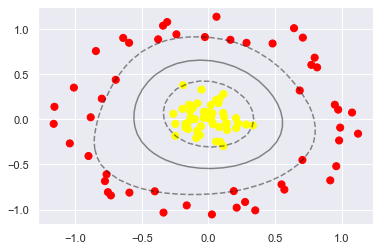

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none');


### Support Vector Machine Summary
- Their dependence on relatively few support vectors means that they are very
compact models, and take up very little memory
- Once the model is trained, the prediction phase is very fast
- Because they are affected only by points near the margin, they work well with
high-dimensional data—even data with more dimensions than samples, which is
a challenging regime for other algorithms
- Their integration with kernel methods makes them very versatile, able to adapt to
many types of data

#### Disadvantages
- Computational cost can rise exponentially as the number of samples increases 
- The results are strongly dependent on a suitable choice for the softening parameter C 
- The results do not have a direct probabilistic interpretation

